<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Tareas/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Francia Aide Verenice Alday Martínez

EXAMEN 1

# 1 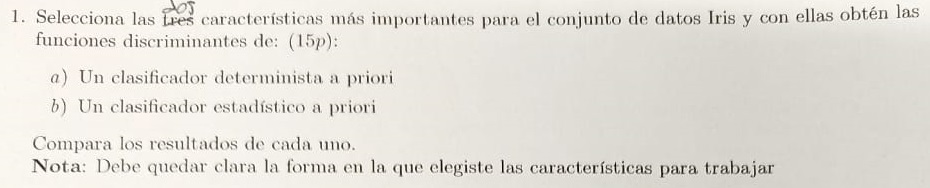

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
# Cargamos el dataset de prueba
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Creamos un objeto de selección de características
sbs = SequentialFeatureSelector(LogisticRegression(penalty=None), n_features_to_select=2, direction="backward")

# Seleccionamos las características más importantes del conjunto de datos de prueba
X_2 = sbs.fit_transform(X, y)

In [ ]:
#Conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_2,y,test_size=0.3,stratify=y, random_state=1)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


a) Un clasificador determinista a priori

funcion discriminante:

$dE = \sqrt{X^T X - 2 X^T Z_K + Z^T_K Z_K}$

para obtener distancias que sean la menor con respecto a alguno de los 2 centroides para determinar que pertenece a una clase.

In [ ]:
from sympy import Matrix, symbols, simplify

def clasif_e(samples):
  n_samples = len(samples)

  # Creando vector generico con simpy
  X = Matrix( [symbols(' x'+str(i+1)) for i in range(samples[0].shape[0])] )

  print('Variables : ',X)
  fds=[]

  for s in samples:
    m = Matrix(np.mean(s, axis=1)) # Se saca la media de los renglones
    fds.append(simplify(X.T*m - (m.T*m)/2))
  return fds

In [ ]:
X_2[:,1]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [ ]:
# Ejemplo de uso
#w1 = np.array( [[1,5,6,1], [2,3,4,-2], [0,1,5,3], [1,3,5,2]] ).T # Se saca la transpuejsta para quje sean conformables, pero se podria segujir el formato de operacion anterior como esta emarcado en el docuemnto
#w2 = np.array( [[6,8,-1,6], [7,9,3,6], [8,7,1,9]]).T

#samples = (w1,w2)
samples = (X_2[:,0],X_2[:,1])
fds = clasif_e(samples)

for fd in fds:
  print(fd)

TypeError: ignored

In [ ]:
for fd in range(len(fds)):
  print('fd'+str(fd+1)+': ',fds[fd].evalf(subs={'x1':3,'x2':1,'x3':3,'x4':1}))

b) Clasificador estadístico a priori

Naive Bayes

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Cargamos el conjunto de datos
iris = load_iris()

# Convertimos el conjunto de datos en un DataFrame de pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Dividimos el conjunto de datos en dos conjuntos, uno de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25)

# Creamos el modelo de Naive Bayes
model = GaussianNB()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Hacemos predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el rendimiento del modelo
print('Precisión:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))


Precisión: 0.9736842105263158
Recall: 0.9736842105263158
F1-score: 0.9738575688232438


# 2
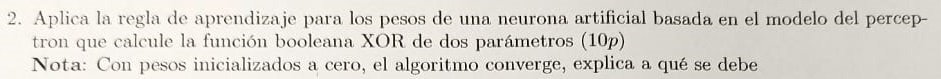

In [ ]:
import random
import numpy as np

def predicion(X,pesos):
  return np.dot(X, pesos[1:]) + pesos[0] # Se suma el sesgo

# para valores mayores a cero, es 1, negativos es -1
def predicion_eleccion(X,pesos):
  return np.where(predicion(X,pesos) >= 0.0, 1,-1) # ALternativa: np.sign(X[i].dot(w[1:]) + w[0])

def aprendizaje(X,pesos,n,y,no_iter):
  # nunca converge, se queda en un bucle, se deben inicializar los pesos a cero
  evolucion = []
  for i in range(no_iter):
    # ajustar los pesos
    for i in range(X.shape[0]):
      update = n * (y[i] - predicion_eleccion(X[i],pesos))
      # se actualiza el umbral
      pesos[0] += update

      # se actualizan los pesos
      pesos[1:] += update * X[i]

    # historico de pesos
    evolucion.append(pesos)

  return pesos, evolucion

In [ ]:
# función XOR booleana
y_xor = np.array([-1,1,1,-1])
X_xor = np.array([ [0,0],[0,1],[1,0],[1,1] ])
pesos_xor = [random.uniform(-1, 1) for _ in range(3)]

In [ ]:
w,e = aprendizaje(X_xor,pesos_xor,0.1,y_xor,1000)

# Bandera de visualizacion
bandera = True

# Evaluación
for i in range(len(X)):
    y_pred = np.where(( np.dot(X_xor[i], w[1:]) + w[0]) >=  0.0, 1,-1)
    print(f'Entradas: ({X_xor[i][0]}, {X_xor[i][1]}), Predicción: {y_pred}, Esperado: {y_xor[i]}')

    if y_pred != y_xor[i]:
      print("El perceptrón No pudo Aprender :C")
      bandera = False
      break

if bandera: print("El perceptrón Sí Aprendió C:")

#Evolucion de los pesos
for i in e: print("Pesos: ",i)

Entradas: (0, 0), Predicción: 1, Esperado: -1
El perceptrón No pudo Aprender :C
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762074206, 0.01662307517132683]
Pesos:  [0.08936341930656166, -0.14756750762

# 3
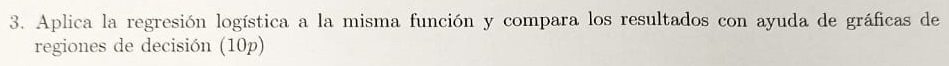

# 4
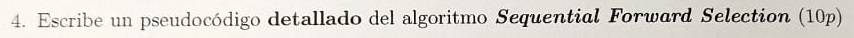

Sequential Forward Selection

1.- Crear un conjunto vacío para guardar las características $Y_k=∅$

2.- Inicializar el algoritmo con k = 0

3.- Determinar la mejor característica mediante un criterio de selección $x*: X = argmax[J(Y_k+x*)]$

4.- Si el conjunto de muestras tiene un rendimiento superior al conjunto de características original, agregar las característica $J(Y_k+x*) > Y_k$

$Y_k, Y_(k+1) = Y_k + x*$

con $k = k+1$

5.- Repetir desde el paso 3 hasta que k sea igual al número deseado de características $k=$n_características

# 5
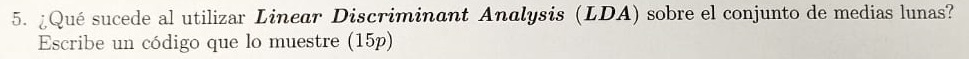

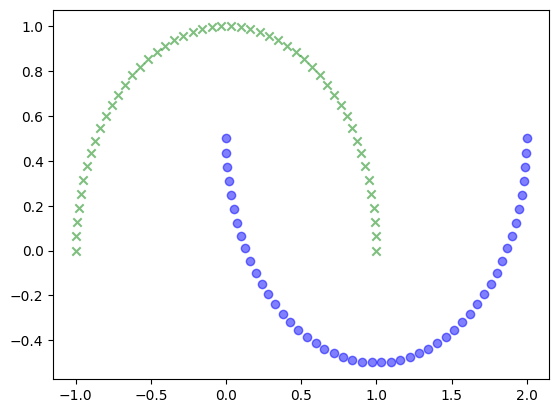

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],marker='x',color='green',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],marker='o',color='blue',alpha=0.5)
plt.show()

In [ ]:
# Estadarizar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Inicializar LDA con un modelo de Regresión Logística
lda = LDA(n_components = 2)
lr = LogisticRegression()
# Ajustar y transformar los datos
X_lda = lda.fit_transform(X_std,y)
lr.fit( X_lda ,y)

ValueError: ignored

LDA solo puede reducir los datos a un número de dimensiones igual o menor que el menor entre el número de características y el número de clases menos uno.

LDA busca proyectar los datos en un espacio de menor dimensión de manera que las clases sean lo más separables posible. Sin embargo, el número de componentes que se pueden obtener está limitado por el menor entre el número de características y el número de clases menos uno.

Para nuestro número de clases sería 2-1 y tendríamos que poner 1 componente

El numero de componentes no puede ser mayor que el mínimo entre el numero de características (n_features) y el numero de clases menos 1 (n_classes-1)
 \begin{align}
    &n\_components = 2\\
    &n\_features =2 \\
    &n\_classes-1 = 2 - 1 = 1
\end{align}

Intentando con n_components = 1

In [ ]:
# Revisar con regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# inicializar LDA y el modelo de RL
lda = LDA(n_components = 1)
lr = LogisticRegression()
# Ajustar y transformar los datos
X_lda = lda.fit_transform(X_std,y)
lr.fit( X_lda ,y)

LogisticRegression()

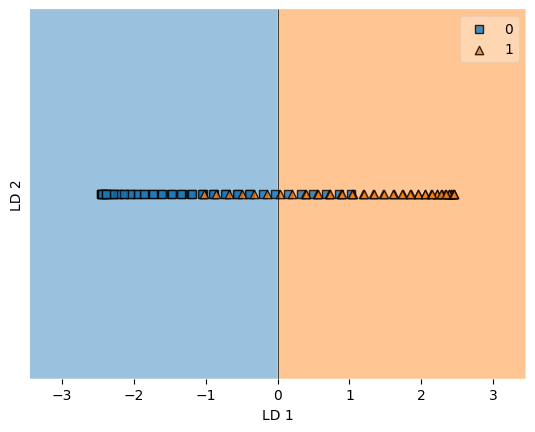

In [ ]:
# Graficamos
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_lda,y,clf=lr )
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

Los datos se aplastan y no podemos visualizar como se están comportando.
Lo que hace es aplanar las curvas, por lo que no nos muestra información separada de nuestros conjuntos y no funciona para separarlos con 1 componente

# 6
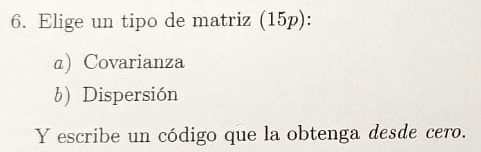

b) Matriz de dispersión

Con una de las tareas:

Escribir un código que obtenga la matriz de dispersión de acuerdo a:

 $S = \sum_{j=1}^{n} (x_j - \bar{x}) (x_j - \bar{x})^T$

donde $\bar{x}$ es el vector de medias.

1. vector_data = conjunto de datos x de entrenamiento estandarizados
2. vector_etiquetas: conjunto de datos y de entrenamiento
3. vector_medias: medias de cada clase

In [ ]:
#Escalamiento para los datos de Iris
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Vector de medias
import numpy as np

# Cantidad de clases
clases = np.unique(y_train)

vector_medias = []

for i in clases:
  datos_clase = X_train_std[y_train==i]

  # Sacando la media de cada clase
  media_datosX = np.mean(datos_clase,axis=0) # axis=0 es para obtener de cada columna
  vector_medias.append(media_datosX) # Vector de medias de las categorias de la clase actual

vector_medias # Vector de medias de cada clase

[array([-1.30082725, -1.25109721]),
 array([0.27036385, 0.1648152 ]),
 array([1.0304634 , 1.08628201])]

In [ ]:
import numpy as np

def matriz_dispersion(vector_data,vector_etiquetas,vector_medias):

  size = vector_data.shape[1]
  Sw = np.zeros((size, size))
  clases =  np.unique(vector_etiquetas)

  for i in clases:
    matrix_aux = np.zeros((size, size))
    for renglon in vector_data[vector_etiquetas==i]:
      medias = vector_medias[i-1].reshape(size,1)
      renglon = renglon.reshape(size,1)

      matriz_dif = renglon - medias
      matrix_aux += matriz_dif.dot(matriz_dif.T)


    Sw += matrix_aux # Se intercambia para que sea compatible la multiplicacion, no obstante se manteniendo lo mismo que A^T A = A A^T

  return Sw

In [ ]:
matriz_dispersion(X_train_std,y_train,vector_medias)

array([[302.89720807, 296.56340927],
       [296.56340927, 299.06918227]])

# 7
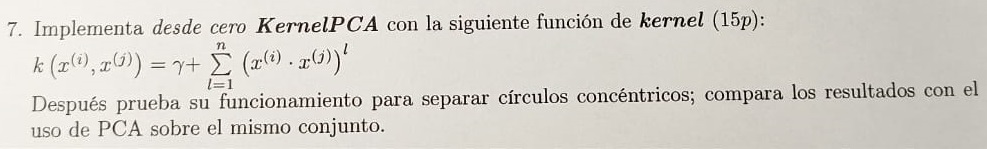

In [ ]:
def rbf_kpca(X,gamma,n_components):
  """ RBF KernelPCA
  Params
  -------
  X: {Numpy ndarray}, shape =[n_samples,n_features]
    cojunto de muestras
  gamma: float
    Parametro de ajuste del kerner RBF
  n_components: int
    Numero de conponentes principales a devolver

  Returns
  ---------
  alphas: {Numpy ndarray}, shape = [n_samples,k_features]
    Conjunto de datos proyectados
  lambdas: {Numpy ndarray}, shape = [n_samples]
    Eigenvalores correspondientes
  """

  # Calcular la distancia euclidiana
  sq_dist = np.sum((np.dot(X,X))**2)
  # Obtener el valor del kernel
  k = np.exp(-gamma * sq_dist)
  # centrar la matriz (restarle la media)
  n = K.shape[0]
  one_n = np.ones((n,n)) /n
  K = K -one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  # btener los eigenpares
  eigenvals, eigenvecs = eigh(K) ## los devuelve ordenados por el valor de los eigenvals
  # nvertimos los arreglos
  eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:,::-1]
  # seleccionamos los k primeros eigenvecs correspondientes a los mayores eigenvals
  alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
  # con los eigenvals
  lambdas = np.column_stack([eigenvals[i] for i in range(n_components)])

  return alphas, lambdas

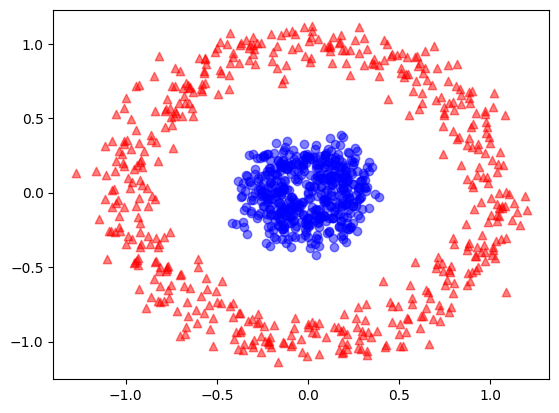

In [ ]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1],color='r',alpha=0.5,marker='^')
plt.scatter(X[y==1,0],X[y==1,1],color='b',alpha=0.5,marker='o')

In [ ]:
# rbf_kpca

X_pca = rbf_kpca(X,gamma=15,n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],marker='o',color='blue',alpha=0.5)

ax[1].scatter(X_pca[y==0,0],np.zeros((500,1))+0.02,marker='^',color='red',alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((500,1))-0.02,marker='^',color='b',alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1]);

ValueError: ignored

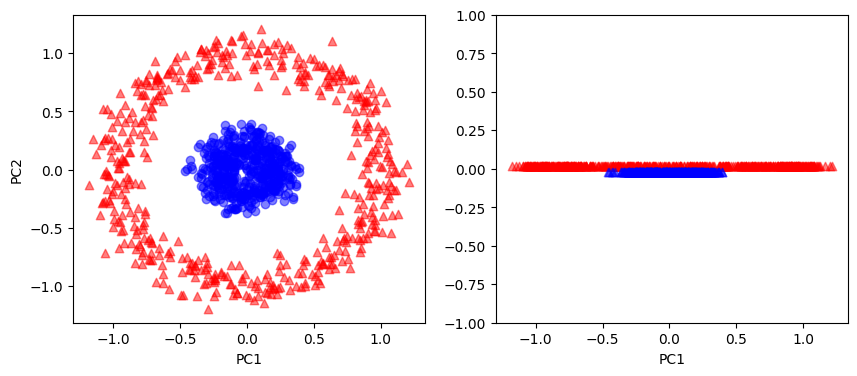

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],marker='o',color='blue',alpha=0.5)

ax[1].scatter(X_pca[y==0,0],np.zeros((500,1))+0.02,marker='^',color='red',alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((500,1))-0.02,marker='^',color='b',alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1]);

# 8
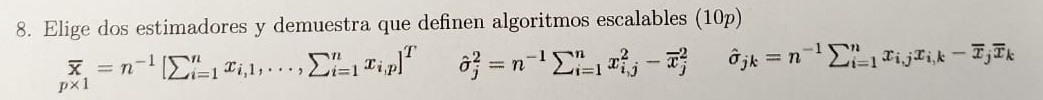

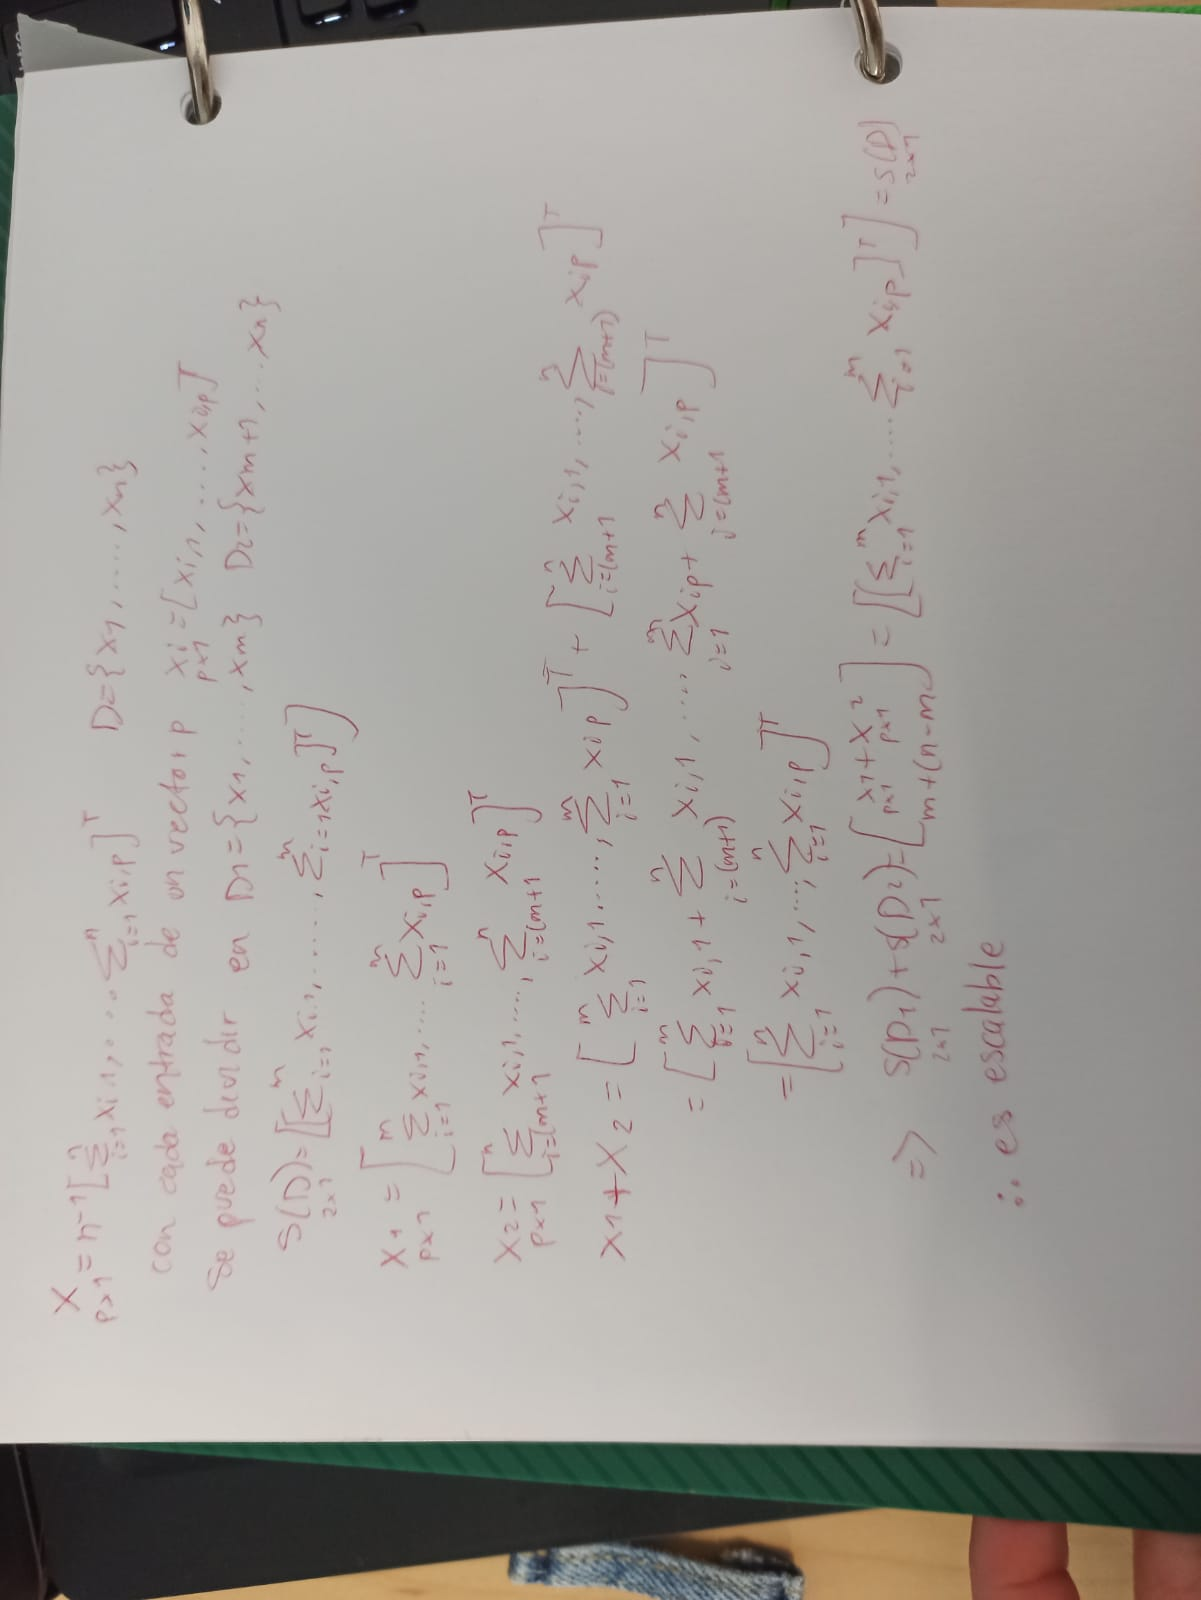

# 9
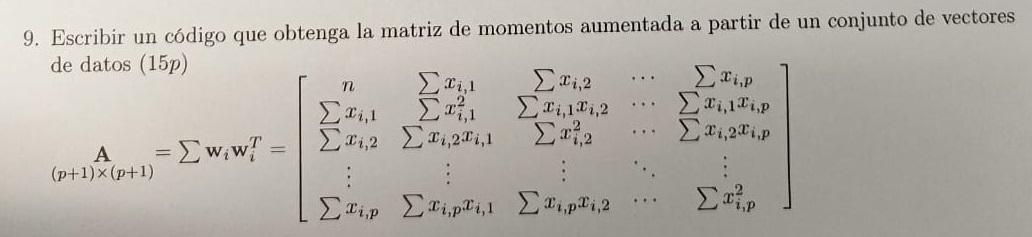

In [ ]:
def matriz_momentos_aumentada(w,n):
  # Aumentar el vector agregando un 1 en la primera entrada, aumentado el vector
  w.insert(0,1)
  w = np.array(w)
  # Realizando el producto exterior, dimension (p+1)x(p+1)
  A = np.outer(w,w.T)
  # Realizando las n sumas a la matriz obtenida del producto anterior
  for i in range(n):
    A += A
  return A


In [ ]:
matriz_momentos_aumentada([1,2,3,4,5],2)

array([[  4,   4,   8,  12,  16,  20],
       [  4,   4,   8,  12,  16,  20],
       [  8,   8,  16,  24,  32,  40],
       [ 12,  12,  24,  36,  48,  60],
       [ 16,  16,  32,  48,  64,  80],
       [ 20,  20,  40,  60,  80, 100]])

In [ ]:
matriz_momentos_aumentada([1,2,3],3)

array([[ 8,  8, 16, 24],
       [ 8,  8, 16, 24],
       [16, 16, 32, 48],
       [24, 24, 48, 72]])

# 10
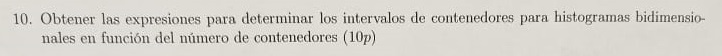

# 11
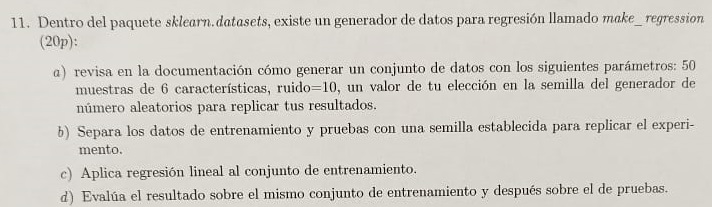

# 12
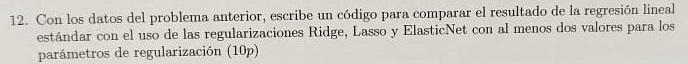